<a href="https://colab.research.google.com/github/ericbonelli/Cientista-de-Dados_EBAC/blob/main/Pratique_1_Arvore_classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árvores II - Tarefa I

![image.png](attachment:f65bd82d-aa56-4cf2-8030-bb758771f332.png)  
[fonte](https://momentum.org/programs-services/manage-your-money/savings-app/pxfuel-creative-commons-zero-cc0-iphone-smartphone-cell-phone-mobile-technology-texting/)

Neste exercício vamos trabalhar com a base de dados de identificação de atividade humana com smartphones. Smartphones possuem acelerômetro e giroscópio, que registram dados de aceleração e giro nos eixos X, Y e Z, com frequencia de 50 Hz (ou seja, 50 registros por segundo). Os dados foram agrupados a medidas de 0.3 Hz, calculando-se variáveis derivadas como aceleração mínima, máxima, média etc por eixo no período agrupado de tempo, resultando em 561 variáveis que podem ser lidas nas bases disponíveis.

A base é oriunda de um experimento, em que os indivíduos realizavam uma de seis atividades corriqueiras:
- andando
- subindo escada
- descendo escada
- parado
- sentado
- deitado

O objetivo é classificar a atividade humana com base nos dados do acelerômetro e giroscópio do celular.

### 1. Carregar a base

Sua primeira atividade é carregar a base.

Ela está disponível neste link:
https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

dados https://archive.ics.uci.edu/ml/machine-learning-databases/00240/  
dataset.names https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.names  
UCI HAR Dataset.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip

Você vai encontrar os seguintes arquivos:

- **features.txt:** contém a lista com os nomes das variáveis
- **features_info.txt:** contém a descrição das variáveis
- **README.txt:** contém uma descrição do estudo e das bases
- **activity_labels:** contém o código da atividade (inteiro entre 1 e 6) e a descrição
- **subject_train.txt:** uma lista indicando que registro pertence a que indivíduo na base de treino
- **X_train.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_train.txt.
- **y_train.txt:** Possui o mesmo número de linhas que X_test. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de treino.
- **subject_test.txt:** uma lista indicando que registro pertence a que indivíduo na base de teste
- **X_test.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_test.txt.
- **y_test.txt:** Possui o mesmo número de linhas que X_train. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de teste.

Carregue as bases:

1. Faça o download dos arquivos.
2. Carregue a base ```features.txt``` em uma *Series* (por exemplo usando o comando ```pd.read_csv()```.
3. Carregue a base subject_train.txt em uma *Series*
4. Carregue a base X_train.txt
    1. Faça com que as colunas deste *dataframe* tenham os nomes indicados em ```features.txt```
    2. Sem alterar a ordem dos *dataframes*, coloque o indicador do indivíduo lido em ```subject_train.txt``` como uma variável a mais neste *dataframe***
    3. Faça com que este *dataframe* tenha um índice duplo, composto pela ordem dos dados e pelo identificador do indivíduo
5. Com a mesma lógica, carregue a base X_test
    1. Certifique-se de que tenha os nomes lidos em ```features.txt```
    2. Coloque o identificador do sujeito lido em ```subject_test.txt```
    3. Defina um índice duplo composto pela ordem do registro e o identificador do registro
6. Salve as bases em arquivos CSV para facilitar a leitura deles na terefa 2 deste módulo
7. Considere que esta base é maior que a da aula, tanto em linhas quanto em colunas. Selecione apenas as três primeiras colunas da base ('tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y' e 'tBodyAcc-mean()-Z'), para efeitos desse exercício.

**OBS:** As bases já estão divididas em treino e teste, de modo que não vamos precisar da função ```train_test_split```.

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
#Carregue a base features.txt
data_f = pd.read_csv('/content/drive/MyDrive/Especialização em IA/Cientista de Dados - Ebac/Desenvolvimento Modelos com Pandas e Python/Árvore de classificação 2/human+activity+recognition+using+smartphones/UCI HAR Dataset/features.txt', sep=' ', header=None)  # Use sep=' ' or sep='\t' if the delimiter is a space or a tab
data_f.shape
data_f

,0,1
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


In [19]:
#Carregue a base subject_train.txt
data_st = pd.read_csv('/content/drive/MyDrive/Especialização em IA/Cientista de Dados - Ebac/Desenvolvimento Modelos com Pandas e Python/Árvore de classificação 2/human+activity+recognition+using+smartphones/UCI HAR Dataset/train/subject_train.txt', sep=' ', header=None)  # Use sep=' ' or sep='\t' if the delimiter is a space or a tab
data_st.shape
data_st.head()

,0
0,1
1,1
2,1
3,1
4,1


In [16]:
#Carregue a base X_train.txt
data_xt = pd.read_csv('/content/drive/MyDrive/Especialização em IA/Cientista de Dados - Ebac/Desenvolvimento Modelos com Pandas e Python/Árvore de classificação 2/human+activity+recognition+using+smartphones/UCI HAR Dataset/train/X_train.txt', sep='\s+', header=None)  # Use sep='\s+' to handle variable number of spaces as delimiter
data_xt.shape
data_xt.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [20]:
#Faça com que as colunas deste dataframe tenham os nomes indicados em features.txt
#Sem alterar a ordem dos dataframes, coloque o indicador do indivíduo lido em subject_train.txt como uma variável a mais neste dataframe**
#Faça com que este dataframe tenha um índice duplo, composto pela ordem dos dados e pelo identificador do indivíduo
import pandas as pd
from collections import Counter

# Carregar features
df_features = data_f  # Use existing data_f
feature_names = df_features[1].tolist()  # Assume feature names are in the first column

# Resolver nomes duplicados adicionando um sufixo numérico
feature_counts = Counter(feature_names)
unique_feature_names = []
seen = {}

for name in feature_names:
    if feature_counts[name] > 1:
        count = seen.get(name, 0) + 1
        seen[name] = count
        unique_feature_names.append(f"{name}_{count}")
    else:
        unique_feature_names.append(name)

# Carregar X_train
x_train = data_xt  # Use existing data_xt
x_train.columns = unique_feature_names  # Assign column names

# Carregar subject_train
subject_train = data_st  # Use existing data_st

# Adicionar identificador do indivíduo
x_train["subject"] = subject_train[0]  # Assume subject IDs are in the first column

# Criar índice duplo
x_train.index = pd.MultiIndex.from_arrays([x_train.index, x_train["subject"]], names=["order", "subject"])

# Remover a coluna subject após definir o índice
del x_train["subject"]

# Exibir as primeiras linhas do DataFrame
print(x_train.head())

               tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
order subject                                                            
0     1                 0.288585          -0.020294          -0.132905   
1     1                 0.278419          -0.016411          -0.123520   
2     1                 0.279653          -0.019467          -0.113462   
3     1                 0.279174          -0.026201          -0.123283   
4     1                 0.276629          -0.016570          -0.115362   

               tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  \
order subject                                                         
0     1               -0.995279         -0.983111         -0.913526   
1     1               -0.998245         -0.975300         -0.960322   
2     1               -0.995380         -0.967187         -0.978944   
3     1               -0.996091         -0.983403         -0.990675   
4     1               -0.998139         -0.980817      

In [23]:
x_train.to_csv('x_train_sum.csv', index=False)

In [ ]:
#Carregue a base subject_test.txt
data_ste = pd.read_csv('/content/drive/MyDrive/Especialização em IA/Cientista de Dados - Ebac/Desenvolvimento Modelos com Pandas e Python/Árvore de classificação 2/human+activity+recognition+using+smartphones/UCI HAR Dataset/test/subject_test.txt', sep=' ', header=None)  # Use sep=' ' or sep='\t' if the delimiter is a space or a tab
data_ste.shape

(2947, 1)

In [14]:
#Carregue a base X_test.txt
data_xte = pd.read_csv('/content/drive/MyDrive/Especialização em IA/Cientista de Dados - Ebac/Desenvolvimento Modelos com Pandas e Python/Árvore de classificação 2/human+activity+recognition+using+smartphones/UCI HAR Dataset/test/X_test.txt', sep='\s+', header=None)  # Use sep='\s+' to handle variable number of spaces as delimiter
data_xte.shape
data_xte.to_csv('X_test.csv', index=False)

In [21]:
#Com a mesma lógica, carregue a base X_test
#Certifique-se de que tenha os nomes lidos em features.txt
#Coloque o identificador do sujeito lido em subject_test.txt
#Defina um índice duplo composto pela ordem do registro e o identificador do registro

import pandas as pd
from collections import Counter

# Carregar features
df_features = data_f  # Use existing data_f
feature_names = df_features[1].tolist()  # Assume feature names are in the first column

# Resolver nomes duplicados adicionando um sufixo numérico
feature_counts = Counter(feature_names)
unique_feature_names = []
seen = {}

for name in feature_names:
    if feature_counts[name] > 1:
        count = seen.get(name, 0) + 1
        seen[name] = count
        unique_feature_names.append(f"{name}_{count}")
    else:
        unique_feature_names.append(name)

# Carregar X_test
x_test = data_xte  # Use existing data_xte

# Ajustar nomes das colunas caso haja diferença no número de colunas
num_columns_x_test = x_test.shape[1]

if num_columns_x_test > len(unique_feature_names):
    print(f"Atenção: X_test tem {num_columns_x_test} colunas, enquanto features.txt tem {len(unique_feature_names)}.")
    unique_feature_names.append("extra_column")  # Adiciona nome fictício
elif num_columns_x_test < len(unique_feature_names):
    print(f"Atenção: X_test tem {num_columns_x_test} colunas, enquanto features.txt tem {len(unique_feature_names)}.")
    unique_feature_names = unique_feature_names[:num_columns_x_test]  # Remove nomes extras

# Aplicar nomes das colunas
x_test.columns = unique_feature_names

# Carregar subject_test
subject_test = data_ste  # Use existing data_ste

# Adicionar identificador do indivíduo
x_test["subject"] = subject_test[0]  # Assume subject IDs are na primeira coluna

# Criar índice duplo
x_test.index = pd.MultiIndex.from_arrays([x_test.index, x_test["subject"]], names=["order", "subject"])

# Remover a coluna subject após definir o índice
del x_test["subject"]

# Exibir as primeiras linhas do DataFrame
print(x_test.head())


               tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
order subject                                                            
0     2                 0.257178          -0.023285          -0.014654   
1     2                 0.286027          -0.013163          -0.119083   
2     2                 0.275485          -0.026050          -0.118152   
3     2                 0.270298          -0.032614          -0.117520   
4     2                 0.274833          -0.027848          -0.129527   

               tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  \
order subject                                                         
0     2               -0.938404         -0.920091         -0.667683   
1     2               -0.975415         -0.967458         -0.944958   
2     2               -0.993819         -0.969926         -0.962748   
3     2               -0.994743         -0.973268         -0.967091   
4     2               -0.993852         -0.967445      

In [22]:
x_test.to_csv('x_test_sum.csv', index=False)

### 2. Ajustar uma árvore de decisão

- 2.1 ajuste uma árvore de decisão com número mínimo de observações por folha = 20. Certifique-se de que você esteja utilizando apenas as 3 variáveis indicadas no exercício anterior.
- 2.2 Calcule os ccp_alphas. Como feito em aula, certifique-se de que todos os valores são positivos, e selecione apenas valores únicos.
- 2.3 Considere que vamos fazer uma árvore para cada valor de ```ccp_alpha```. Para ter um pouco mais de velocidade, crie uma coleção de dados com os ```ccp_alphas```, considerando apenas 1 a cada 5 valores. Dica: utilize o slicing do tipo ```array[::5]``` para isto. Caso se sinta seguro, fique à vontade para utilizar mais valores de ```ccp_alpha```.

In [27]:
y_train = pd.read_csv('/content/drive/MyDrive/Especialização em IA/Cientista de Dados - Ebac/Desenvolvimento Modelos com Pandas e Python/Árvore de classificação 2/human+activity+recognition+using+smartphones/UCI HAR Dataset/train/y_train.txt', header=None)
X_train = pd.read_csv('/content/x_train_sum.csv')
X_train = X_train[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']]
clf = DecisionTreeClassifier(random_state=2360873, max_depth=3, max_leaf_nodes=20).fit(X_train, y_train)

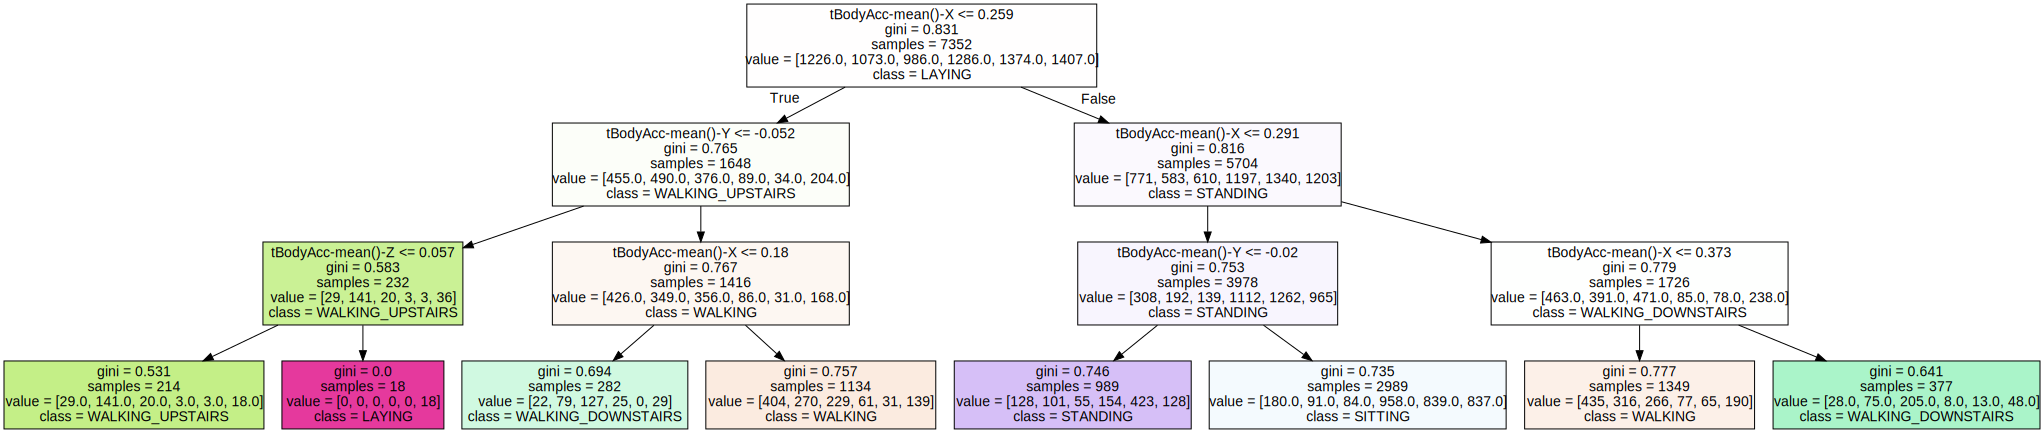

In [29]:
import graphviz
from sklearn.tree import export_graphviz
# DOT data
# Assuming your y_train data uses labels 1 to 6 for the 6 activities
class_names = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']
dot_data = export_graphviz(clf, out_file=None,
                                feature_names=X_train.columns,
                                class_names=class_names,  # Changed line
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

In [31]:
# Calcule os ccp_alphas. Como feito em aula, certifique-se de que todos os valores são positivos, e selecione apenas valores únicos.
caminho = DecisionTreeClassifier(random_state=2360873).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, path.impurities

In [32]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(X_train, y_train)
    clfs.append(clf)

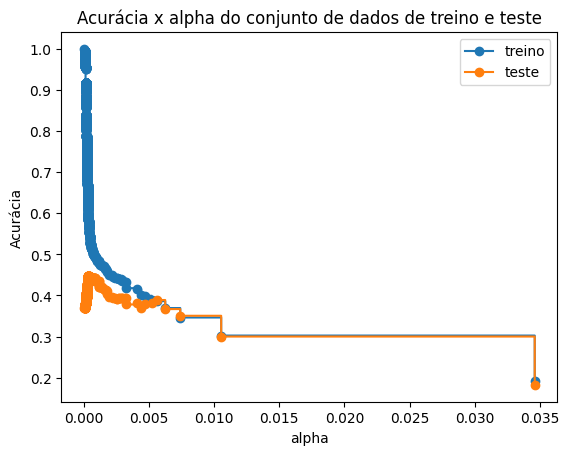

In [36]:
y_test = pd.read_csv('/content/drive/MyDrive/Especialização em IA/Cientista de Dados - Ebac/Desenvolvimento Modelos com Pandas e Python/Árvore de classificação 2/human+activity+recognition+using+smartphones/UCI HAR Dataset/test/y_test.txt', header=None)
X_test = pd.read_csv('/content/x_test_sum.csv')
X_test = X_test[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']]

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas, train_scores, marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

### 3. Desempenho da árvore por ccp_alpha

- 3.1: Rode uma árvore para cada ```ccp_alpha```, salvando cada árvore em uma lista
- 3.2: Calcule a acurácia de cada árvore na base de treinamento e de teste
- 3.3: Monte um gráfico da acurácia em função do ```ccp_alpha``` na base de validação e na base de teste
- 3.4: Selecione a melhor árvore como sendo aquela que possui melhor acurácia na base de teste
- 3.5: Qual a melhor acurácia que se pode obter com estas três variáveis?

**Dica:** utilize a estrutura do notebook apresentado em aula.  
**Dica 2:** meça o tempo com a função mágica ```%%time``` na primeira linha da célula.  
**Sugestão:** caso fique confortável com o tempo de execução, faça a busca pelo melhor ```ccp_alpha``` com mais iterações.  
**Sugestão 2:** caso fique confortável com o tempo de execução, tente inserir uma ou mais variáveis adicionais e veja se consegue aumentar a acurácia.

In [39]:
%%time
ind_melhor_arvore = len(test_scores) - test_scores[::-1].index(max(test_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]
melhor_arvore

CPU times: user 53 µs, sys: 2 µs, total: 55 µs
Wall time: 57.5 µs


DecisionTreeClassifier(ccp_alpha=0.00035561232685071484, random_state=2360873)

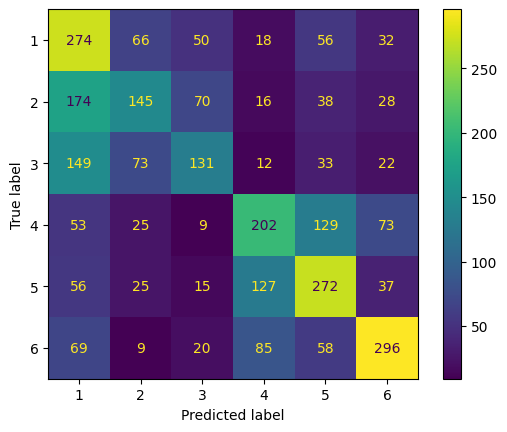

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, melhor_arvore.predict(X_test))

# Create the ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=melhor_arvore.classes_)

# Plot the confusion matrix
disp.plot()
plt.show()